Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the dataset

In [3]:
df=pd.read_csv(r"C:\Users\USER\Desktop\AI & ML INTERNSHIP\day3\Housing.csv")

Data preprocessing

In [5]:
# to see first rows of the dataset
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
# To see the last five rows in the dataset
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [9]:
# to see the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [11]:
# to see the description of the dataset
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [13]:
#to see the shape of the dataset
df.shape

(545, 13)

In [15]:
# check for missing values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [17]:
# to see the columns of the dataset
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

Define Features (X) and Target (y)

Features (X): area, bedrooms, bathrooms — used to predict.

Target (y): price — the output we want to predict.

In [23]:
X=df[['area','bedrooms','bathrooms']] # independent variables
y=df['price'] # dependent variable

Split the Data into Train and Test Sets

Splits dataset into:

Training set (60% of data),

Testing set (40% of data).

random_state=101 ensures reproducibility (same split each time).

In [25]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.4 , random_state=101)

Train a Linear Regression Model

Import LinearRegression model.

Create an instance model.

Fit the model to training data (X_train, y_train).

The model learns coefficients (weights) for each feature.

In [27]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

Print Model Intercept

In [29]:
print(model.intercept_) #Intercept is the bias term — where the regression line crosses the Y-axis.

-344606.84563457686


In [ ]:
Show Feature Coefficients

In [33]:
df_coeff=pd.DataFrame(model.coef_.reshape(-1,1),index=X.columns, columns=['Coefficient'])
print(df_coeff)

            Coefficient
area       4.017596e+02
bedrooms   3.457636e+05
bathrooms  1.521708e+06


area weight: 401.75 — for each additional sq ft, price increases by ₹401.75.

bedrooms weight: 345,763 — having one extra bedroom adds about ₹345,763 to the price.

bathrooms weight: 1,521,708 — having one more bathroom adds about ₹1.5 million to price.



Make Predictions

In [35]:
y_pred=model.predict(X_test)

Calculate Model Metrics

Mean Squared Error (MSE): measures average squared difference between actual and predicted values.

Output: 1.85 x 10^12 (large value, means errors are quite big).

R² Score: proportion of variance in y explained by the model.

Output: 0.439 (means 43.9% of variation in price is explained by area, bedrooms, bathrooms).


In [39]:
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [ ]:
print("*********** Print Metrics and Model Parameters****************")
print("Mean square error:",mse) #
print("Coefficient of Determination (R-squared) :",r2)
print("Model intercept:",model.intercept_)
print("Feature coefficient :",df_coeff)
      

Better Scatter Plot -Plot Actual vs Predicted

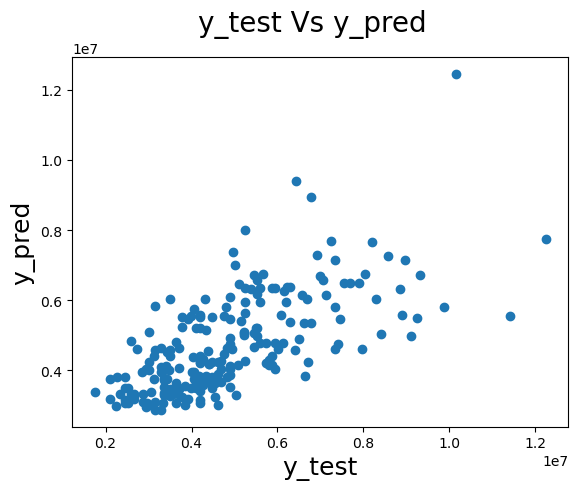

In [41]:
fig=plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test Vs y_pred', fontsize=20)
plt.xlabel('y_test',fontsize=18)
plt.ylabel('y_pred',fontsize=18)
plt.show()

In [ ]:
bathrooms will have the tallest bar (because it had the biggest coefficient).

bedrooms and area will have shorter bars.

Easy to compare the importance visually!
 

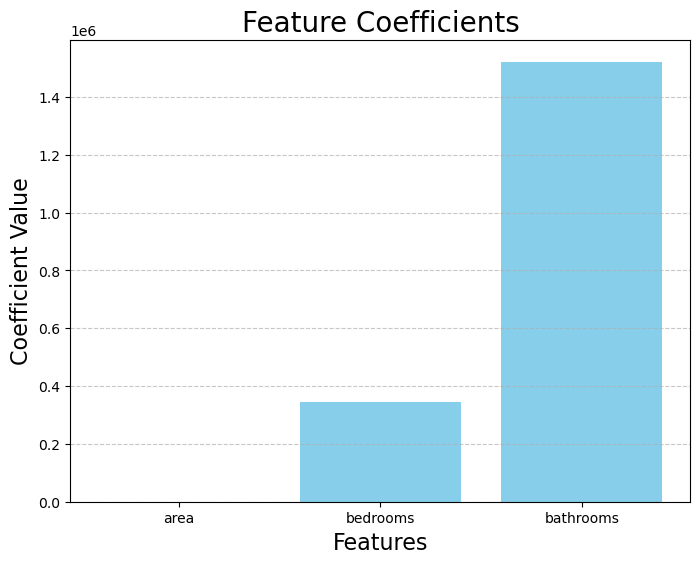

In [43]:
plt.figure(figsize=(8,6))
plt.bar(df_coeff.index, df_coeff['Coefficient'], color='skyblue')
plt.title('Feature Coefficients', fontsize=20)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Coefficient Value', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()